In [1]:
from astropy.io import fits
import os
from sklearn import preprocessing
import shutil
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import optimize
from scipy.interpolate import CubicSpline
from scipy.integrate import simps
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import gaussian_filter
import scipy.signal as signal
from astropy.time import Time
import pandas as pd
from lmfit import Model
from PyAstronomy.pyasl import foldAt
from scipy.optimize import curve_fit
import matplotlib.colors as colors
import matplotlib.cbook as cbook
from scipy.ndimage.filters import uniform_filter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import lightkurve as lk
from pylab import rc
from matplotlib import gridspec
from matplotlib import transforms
from matplotlib import colors
from scipy.stats import gaussian_kde
from pylab import *
rcParams['font.family'] = 'serif'
rcParams['font.sans-serif'] = ['Times']
from scipy.optimize import leastsq
from gatspy import periodic
import astropy.units as u

/home/nwal/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [5]:
search_result = lk.search_lightcurvefile('WD 0010+280')
search_result
sec3O = search_result[0].download()
#sec3O.plot()

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  """Entry point for launching an IPython kernel.


/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  """Entry point for launching an IPython kernel.


[1764.68967147 1764.69106036 1764.69244926 ... 1787.96699877 1787.96838761
 1787.96977644]
0.0013178897571987493
0.9999999997694041


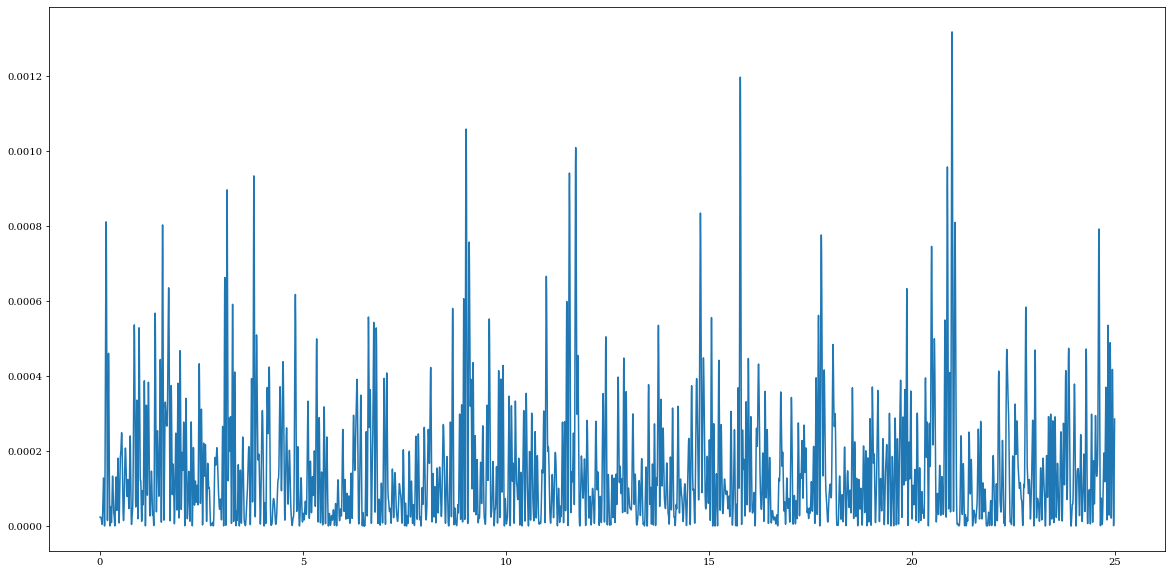

In [22]:
sec3 = sec3O.PDCSAP_FLUX.remove_nans()
flux = sec3.flux.to_value()
#flux = flux.to_value()
time = sec3.time
print(time)
freq = np.linspace(0.001, 25, 10000)/u.d
power = LombScargle(time, flux).power(freq)
plt.figure(figsize=(20,10))
plt.plot(freq,power)
#print(np.isnan(time).sum())
#print(np.isnan(flux).sum())
print(power.max())
powerTess = power
ls = LombScargle(time,flux)
print(ls.false_alarm_probability(power.max()))

In [2]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

def foldMethod(timeArray, period):
    phases = []
    for el in timeArray:
        phase = el/period - int(el/period)
        phases.append(phase)
    return np.array(phases)

0.001


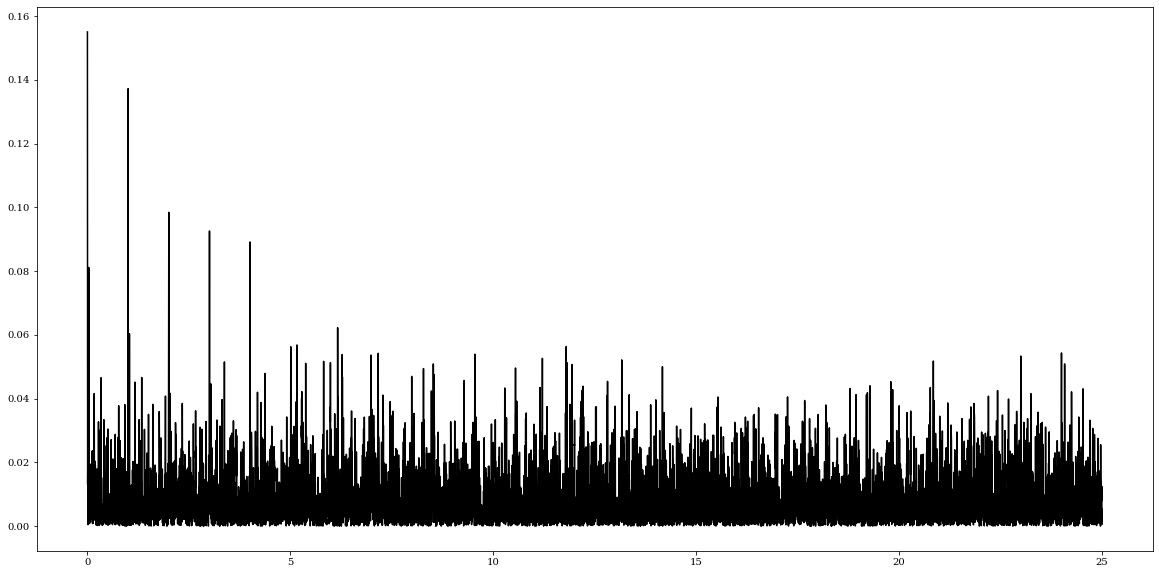

In [3]:
data1 = pd.read_csv('pg10ztf/PG10G.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
freq = np.linspace(0.001, 25, 10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
print(freq[np.argmax(powerPl)])

powerZTFG = powerPl


In [4]:
timeZTF1

0      58263.484734
1      58274.452986
2      58277.446759
3      58280.447870
4      58283.447500
           ...     
257    59223.144224
258    59227.113252
259    59229.174282
260    59231.113785
261    59233.131725
Name: mjd, Length: 244, dtype: float64

16.21447284728473


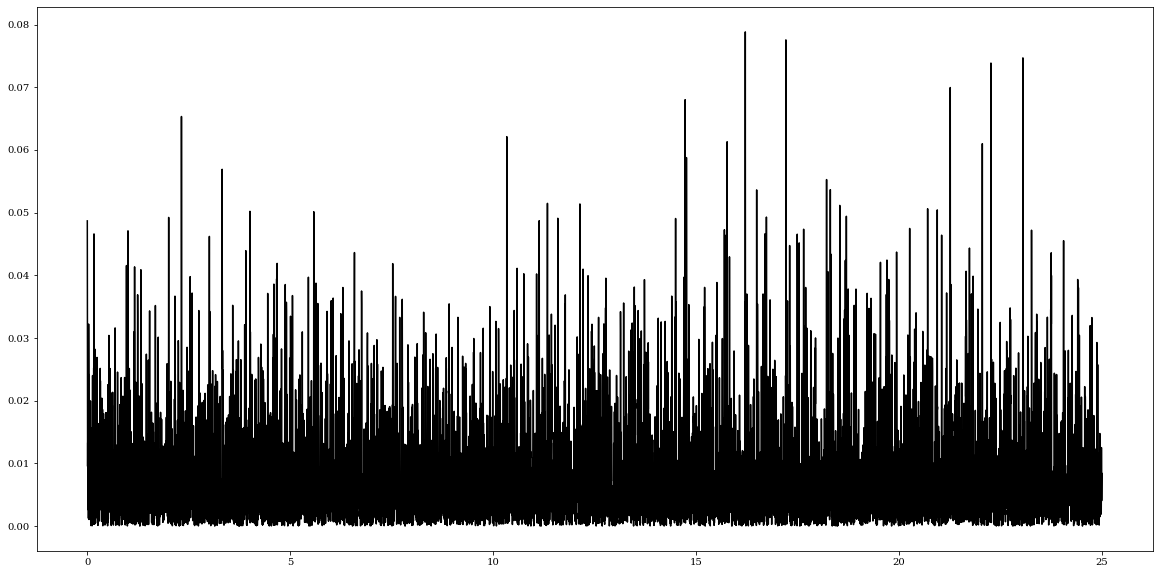

In [22]:
data1 = pd.read_csv('pg10ztf/PG10R.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
freq = np.linspace(0.001, 25, 10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
print(freq[np.argmax(powerPl)])

powerZTFR = powerPl


5.753845184518452


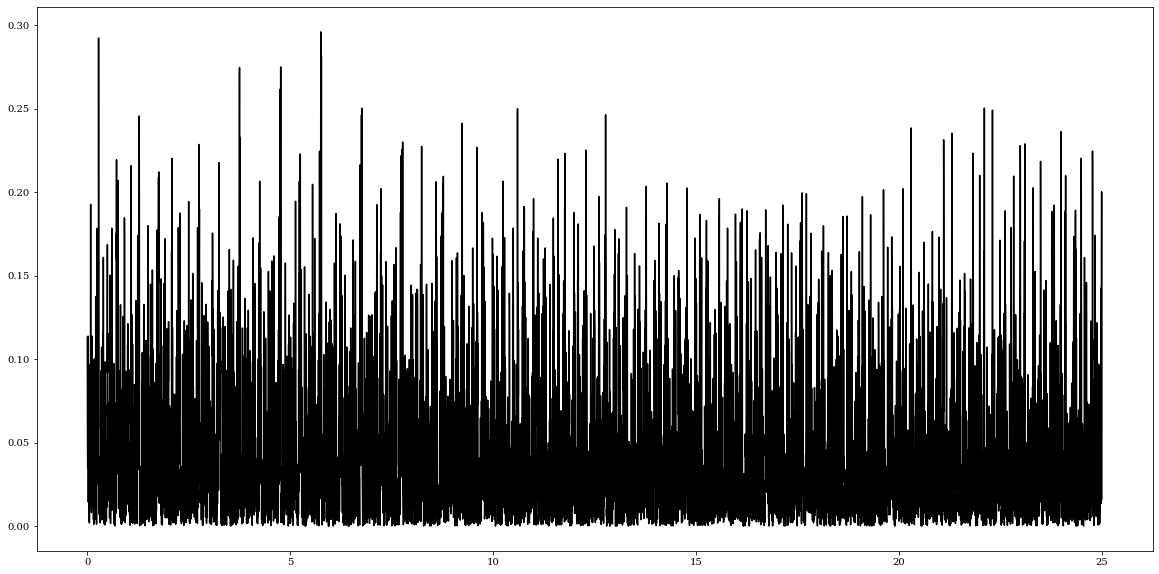

In [23]:
data1 = pd.read_csv('pg10ztf/PG10I.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
fluxZTF1Old = fluxZTF1
zeroMag = data1['magzp']
#fluxZTF1 = 30/(10**((-fluxZTF1+zeroMag)/2.5))
timeZTF1 = timeZTF1#-2457000
#fluxZTF1 = (10**((-fluxZTF1)))
#fluxZTF1 = 1000/(10**((fluxZTF1+26.74)/2.5))
#fluxZTF1 = 30*10**((zeroMag-fluxZTF1)/2.5)
fluxZTF1 = 3.631*(10**(-fluxZTF1/2.5))#jay's way
fluxZTF1 = (fluxZTF1/np.mean(fluxZTF1))-1
freq = np.linspace(0.001, 25, 10000)
powerPl = LombScargle(timeZTF1,fluxZTF1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
print(freq[np.argmax(powerPl)])

powerZTFI = powerPl


Text(0.5, 0, 'Frequency, d-1')

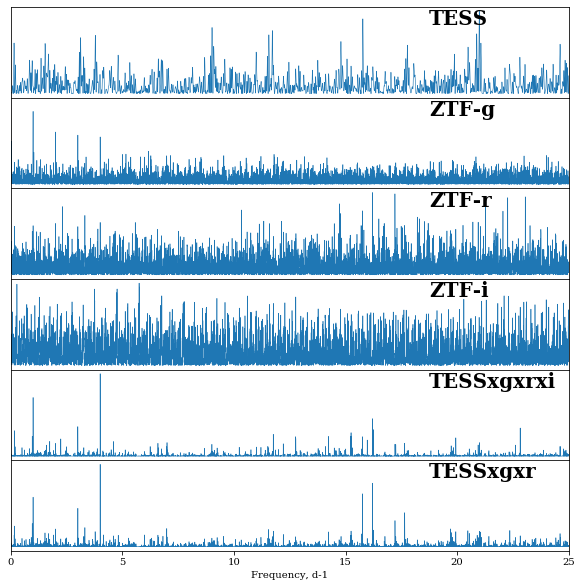

In [8]:
import string
fig, axs = plt.subplots(6,1,figsize=(10,10))
plt.subplots_adjust(hspace = 0)

axs = axs.flat
names = ['TESS', 'ZTF-g', 'ZTF-r', 'ZTF-i', 'TESSxgxrxi', 'TESSxgxr']
for n, ax in enumerate(axs):
    ax.text(0.75, 0.8, names[n], transform=ax.transAxes, size=20, weight='bold')
axs[0].plot(freq, powerTess,lw=0.6)
axs[0].set_xlim(0,25)
axs[1].plot(freq, powerZTFG,lw=0.6)
axs[1].set_xlim(0,25)
axs[2].plot(freq, powerZTFR,lw=0.6)
axs[2].set_xlim(0,25)
axs[3].plot(freq, powerZTFI,lw=0.6)
axs[3].set_xlim(0,25)
axs[4].plot(freq, powerTess*powerZTFG*powerZTFR*powerZTFI,lw=0.6)
axs[4].set_xlim(0,25)
axs[5].plot(freq, powerTess*powerZTFG*powerZTFR,lw=0.6)
axs[5].set_xlim(0,25)
axs[0].axes.yaxis.set_visible(False)
axs[1].axes.yaxis.set_visible(False)
axs[2].axes.yaxis.set_visible(False)
axs[3].axes.yaxis.set_visible(False)
axs[4].axes.yaxis.set_visible(False)
axs[5].axes.yaxis.set_visible(False)
axs[0].axes.xaxis.set_visible(False)
axs[1].axes.xaxis.set_visible(False)
axs[2].axes.xaxis.set_visible(False)
axs[3].axes.xaxis.set_visible(False)
axs[4].axes.xaxis.set_visible(False)
axs[5].set_xlabel('Frequency, d-1')
#plt.savefig('PG0010LSInd.pdf')

0.2494549114551072


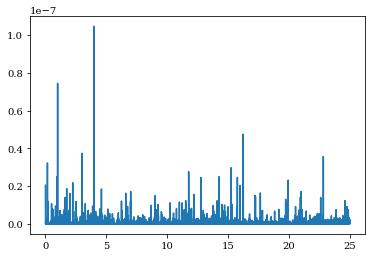

In [9]:
plt.plot(freq, powerTess*powerZTFG*powerZTFR*powerZTFI)
print(1/freq[np.argmax(powerTess*powerZTFG*powerZTFR*powerZTFI)])

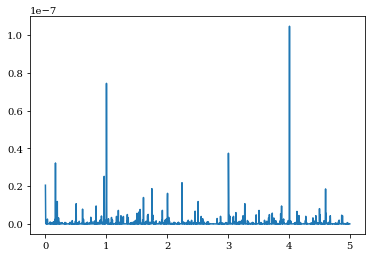

In [10]:
plt.plot(freq[:2000],(powerTess*powerZTFG*powerZTFR*powerZTFI)[:2000])

In [25]:
import sys
!conda install --yes --prefix {sys.prefix} gatspy

Solving environment: done

## Package Plan ##

  environment location: /home/nwal/anaconda3

  added / updated specs:
    - gatspy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py37h06a4308_1         2.9 MB
    gatspy-0.3                 |             py_0          31 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following NEW packages will be INSTALLED:

  gatspy             conda-forge/noarch::gatspy-0.3-py_0

The following packages will be UPDATED:

  conda                                4.9.2-py37h06a4308_0 --> 4.10.1-py37h06a4308_1



gatspy-0.3           | 31 KB     | ##################################### | 100% 
conda-4.10.1         | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: d

In [32]:
filts = np.take(list('g'), np.arange(10), mode='wrap')
filts

array(['g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g'], dtype='<U1')

In [11]:
data1 = pd.read_csv('pg10ztf/PG10G.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFG = timeZTF1
magsZTFG = fluxZTF1
dyZTFG = errZTF1
filtZTFG = np.take(list('G'), np.arange(len(dyZTFG)), mode='wrap')
data1 = pd.read_csv('pg10ztf/PG10R.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFR = timeZTF1
magsZTFR = fluxZTF1
dyZTFR = errZTF1
filtZTFR = np.take(list('R'), np.arange(len(dyZTFR)), mode='wrap')
data1 = pd.read_csv('pg10ztf/PG10I.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFI = timeZTF1
magsZTFI = fluxZTF1
dyZTFI = errZTF1


/home/nwal/anaconda3/lib/python3.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


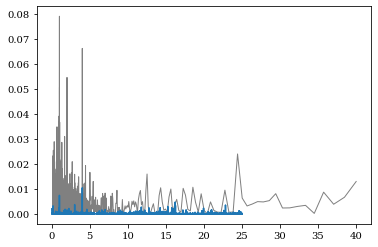

In [12]:
filtZTFI = np.take(list('I'), np.arange(len(dyZTFI)), mode='wrap')
timeF = np.concatenate((tZTFG,tZTFR,tZTFI))
magsF = np.concatenate((magsZTFG,magsZTFR,magsZTFI))
dyF = np.concatenate((dyZTFG,dyZTFR,dyZTFI))
filF = np.concatenate((filtZTFG,filtZTFR,filtZTFI))
periods = np.linspace(0.025, 10, 10000)
#model = periodic.NaiveMultiband(BaseModel=periodic.LombScargleFast)
#model.fit(timeF, magsF, dyF, filF)
#P = model.scores(periods)


LS_multi = periodic.LombScargleMultiband(Nterms_base=1, Nterms_band=0)
LS_multi.fit(timeF, magsF, dyF, filF)
P_multi = LS_multi.periodogram(periods)
plt.plot(1/periods, P_multi, lw=1, color='gray')
plt.plot(freq, 100000*powerTess*powerZTFG*powerZTFR*powerZTFI)

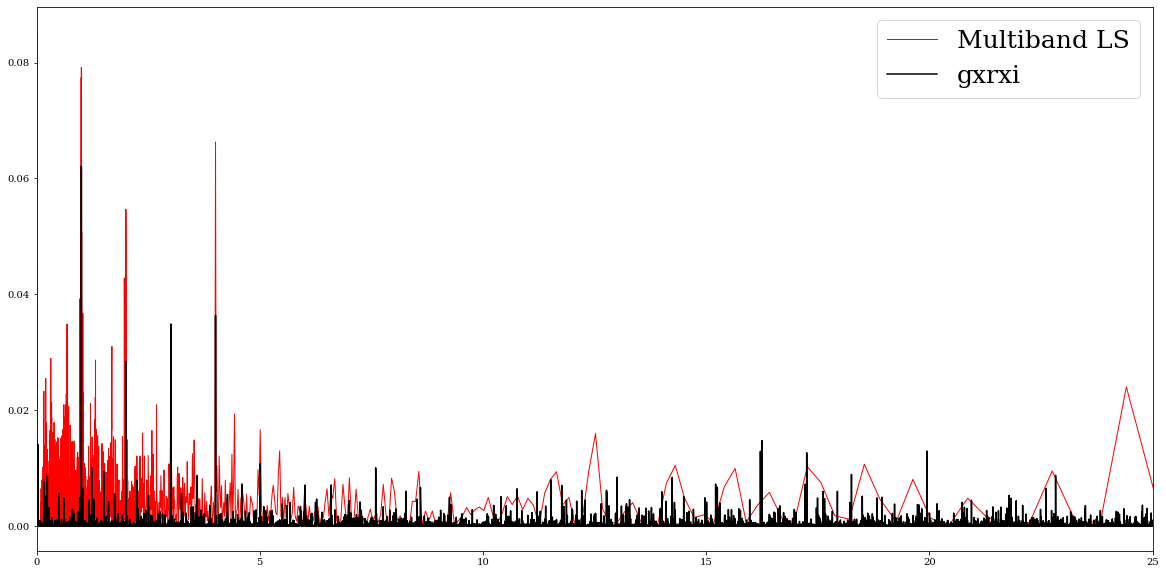

In [13]:
plt.figure(figsize=(20,10))
plt.plot(1/periods, P_multi, lw=1, color='r', label='Multiband LS')
plt.plot(freq, 100*powerZTFG*powerZTFR*powerZTFI,c='k',label='gxrxi')
plt.xlim(0,25)
plt.legend(fontsize=25)
#plt.savefig('PG0010LSMultiNTESS.pdf')

In [21]:
data1 = pd.read_csv('pg10ztf/PG10G.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFG = timeZTF1
magsZTFG = fluxZTF1
dyZTFG = errZTF1
filtZTFG = np.take(list('G'), np.arange(len(dyZTFG)), mode='wrap')
data1 = pd.read_csv('pg10ztf/PG10R.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFR = timeZTF1
magsZTFR = fluxZTF1
dyZTFR = errZTF1
filtZTFR = np.take(list('R'), np.arange(len(dyZTFR)), mode='wrap')
data1 = pd.read_csv('pg10ztf/PG10I.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFI = timeZTF1
magsZTFI = fluxZTF1
dyZTFI = errZTF1
filtZTFI = np.take(list('I'), np.arange(len(dyZTFI)), mode='wrap')


search_result = lk.search_lightcurvefile('WD 0010+280')
sec3O = search_result[0].download()
sec3 = sec3O.PDCSAP_FLUX.remove_nans()
fluxTESS = sec3.flux
timeTESS = sec3.time
errTESS = sec3.flux_err
filtTESS = np.take(list('T'), np.arange(len(timeTESS)), mode='wrap')


timeF = np.concatenate((tZTFG,tZTFR,tZTFI,timeTESS))
magsF = np.concatenate((magsZTFG,magsZTFR,magsZTFI,fluxTESS))
dyF = np.concatenate((dyZTFG,dyZTFR,dyZTFI,errTESS))
filF = np.concatenate((filtZTFG,filtZTFR,filtZTFI,filtTESS))
#periods = np.linspace(0.025, 10, 10000)
freq = np.linspace(0.001, 25, 10000)
periods = 1/freq
model = periodic.NaiveMultiband(BaseModel=periodic.LombScargleFast)
model.fit(timeF, magsF, dyF, filF)
P = model.scores(periods)

/home/nwal/anaconda3/lib/python3.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:445: UserWarning: The score() method defaults to a slower O[N^2] algorithm.
Use the score_frequency_grid() method to access the fast FFT-based algorithm.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("The score() method defaults to a slower O[N^2] "


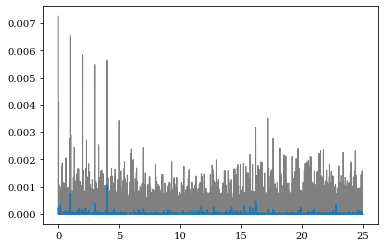

In [22]:
LS_multi = periodic.LombScargleMultiband(Nterms_base=1, Nterms_band=0)
LS_multi.fit(timeF, magsF, dyF, filF)
P_multi = LS_multi.periodogram(periods)
plt.plot(1/periods, P_multi, lw=1, color='gray')
plt.plot(freq, 10000*powerTess*powerZTFG*powerZTFR*powerZTFI)

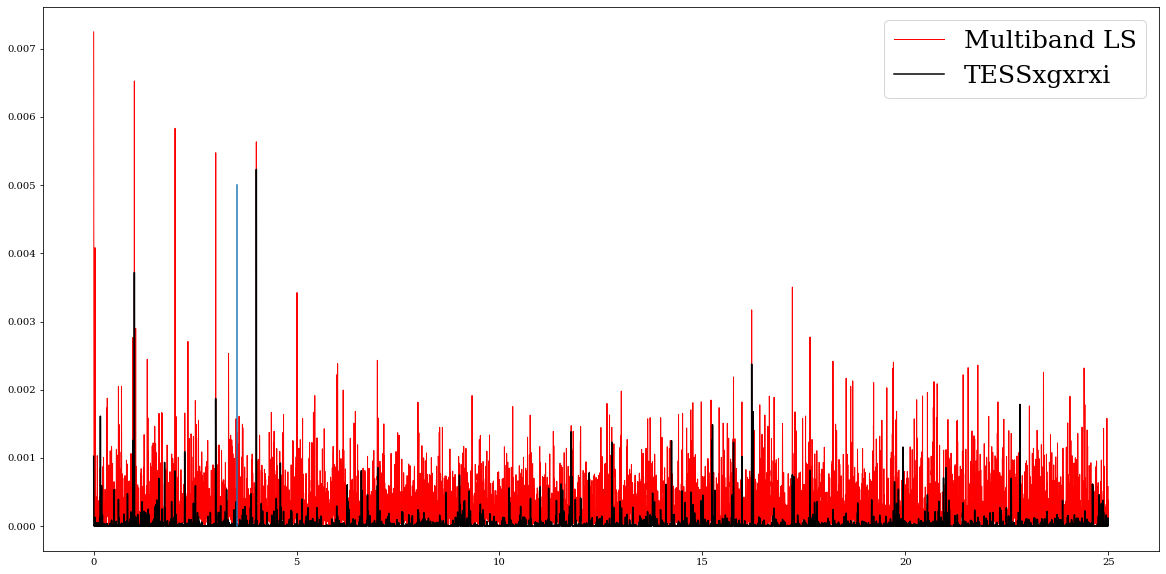

In [23]:
plt.figure(figsize=(20,10))
plt.plot(1/periods, P_multi, lw=1, color='r', label='Multiband LS')
plt.plot(freq, 50000*powerTess*powerZTFG*powerZTFR*powerZTFI,c='k',label='TESSxgxrxi')
#plt.xlim(3,4)
plt.legend(fontsize=25)
plt.plot([3.5283528352835285,3.5283528352835285],[0,0.005])
#plt.savefig('PG0010LSMulti.pdf')

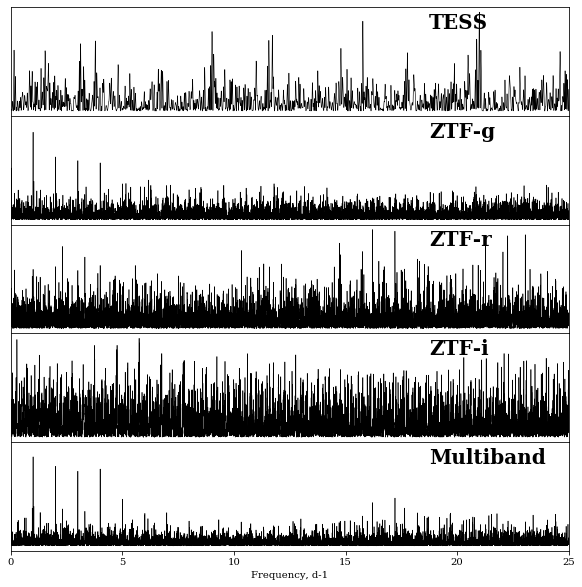

In [26]:
import string
fig, axs = plt.subplots(5,1,figsize=(10,10))
plt.subplots_adjust(hspace = 0)

axs = axs.flat
names = ['TESS', 'ZTF-g', 'ZTF-r', 'ZTF-i', 'Multiband']
for n, ax in enumerate(axs):
    ax.text(0.75, 0.8, names[n], transform=ax.transAxes, size=20, weight='bold')
axs[0].plot(freq, powerTess,lw=0.6, c='k')
axs[0].set_xlim(0,25)
axs[1].plot(freq, powerZTFG,lw=0.6, c='k')
axs[1].set_xlim(0,25)
axs[2].plot(freq, powerZTFR,lw=0.6, c='k')
axs[2].set_xlim(0,25)
axs[3].plot(freq, powerZTFI,lw=0.6, c='k')
axs[3].set_xlim(0,25)
axs[4].plot(1/periods, P_multi,lw=0.6, c='k')
axs[4].set_xlim(0,25)
axs[0].axes.yaxis.set_visible(False)
axs[1].axes.yaxis.set_visible(False)
axs[2].axes.yaxis.set_visible(False)
axs[3].axes.yaxis.set_visible(False)
axs[4].axes.yaxis.set_visible(False)
axs[0].axes.xaxis.set_visible(False)
axs[1].axes.xaxis.set_visible(False)
axs[2].axes.xaxis.set_visible(False)
axs[3].axes.xaxis.set_visible(False)
axs[4].set_xlabel('Frequency, d-1')
plt.savefig('PG0010PhotSum.pdf')

In [6]:
data1 = pd.read_csv('/home/nwal/Desktop/PG0010/Gaia EDR3 2859951106737135488.csv', delimiter=',')
#data1.replace("", nan_value, inplace=True)
timeZTF1 = data1['mjd']
fluxZTF1 = data1['flux_W1']
errZTF1 = data1['flux_error_W1']
tWISE1 = timeZTF1
magsWISE1 = fluxZTF1
dyWISE1 = errZTF1
filtWISE1 = np.take(list('WISE1'), np.arange(len(dyWISE1)), mode='wrap')
print(tWISE1)
data1 = pd.read_csv('/home/nwal/Desktop/PG0010/Gaia EDR3 2859951106737135488.csv', delimiter=',')
nan_value = float("NaN") 
data1.replace("", nan_value, inplace=True)
data1.dropna(subset = ["flux_W2"], inplace=True)
timeZTF1 = data1['mjd']
fluxZTF1 = data1['flux_W2']
errZTF1 = data1['flux_error_W2']
tWISE2 = timeZTF1
magsWISE2 = fluxZTF1
dyWISE2 = errZTF1
filtWISE2 = np.take(list('WISE2'), np.arange(len(dyWISE2)), mode='wrap')

print(tWISE2)

0      55384.819720
1      55384.819847
2      55384.952024
3      55384.952151
4      55385.084327
           ...     
205    59036.134310
206    59036.199761
207    59036.330538
208    59036.461314
209    59036.592090
Name: mjd, Length: 210, dtype: float64
1      55384.819847
2      55384.952024
4      55385.084327
7      55385.348935
8      55385.415150
           ...     
196    58833.500546
197    58833.631323
199    59035.611206
200    59035.741982
207    59036.330538
Name: mjd, Length: 66, dtype: float64


In [5]:
data1 = pd.read_csv('pg10ztf/PG10G.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFG = timeZTF1
magsZTFG = fluxZTF1
dyZTFG = errZTF1
filtZTFG = np.take(list('G'), np.arange(len(dyZTFG)), mode='wrap')
data1 = pd.read_csv('pg10ztf/PG10R.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFR = timeZTF1
magsZTFR = fluxZTF1
dyZTFR = errZTF1
filtZTFR = np.take(list('R'), np.arange(len(dyZTFR)), mode='wrap')
data1 = pd.read_csv('pg10ztf/PG10I.csv', delimiter=',')
data1 = data1[data1["catflags"] < 1]
timeZTF1 = data1['mjd']
fluxZTF1 = data1['mag']
errZTF1 = data1['magerr']
tZTFI = timeZTF1
magsZTFI = fluxZTF1
dyZTFI = errZTF1
filtZTFI = np.take(list('I'), np.arange(len(dyZTFI)), mode='wrap')


data1 = pd.read_csv('/home/nwal/Desktop/PG0010/Gaia EDR3 2859951106737135488.csv', delimiter=',')
#data1.replace("", nan_value, inplace=True)
timeZTF1 = data1['mjd']
fluxZTF1 = data1['flux_W1']
errZTF1 = data1['flux_error_W1']
tWISE1 = timeZTF1
magsWISE1 = fluxZTF1
dyWISE1 = errZTF1
filtWISE1 = np.take(list('WISE1'), np.arange(len(dyWISE1)), mode='wrap')

data1 = pd.read_csv('/home/nwal/Desktop/PG0010/Gaia EDR3 2859951106737135488.csv', delimiter=',')
nan_value = float("NaN") 
data1.replace("", nan_value, inplace=True)
data1.dropna(subset = ["flux_W2"], inplace=True)
timeZTF1 = data1['mjd']
fluxZTF1 = data1['flux_W2']
errZTF1 = data1['flux_error_W2']
tWISE2 = timeZTF1
magsWISE2 = fluxZTF1
dyWISE2 = errZTF1
filtWISE2 = np.take(list('WISE2'), np.arange(len(dyWISE2)), mode='wrap')


search_result = lk.search_lightcurvefile('WD 0010+280')
sec3O = search_result[0].download()
sec3 = sec3O.PDCSAP_FLUX.remove_nans()
fluxTESS = sec3.flux
timeTESS = sec3.time
errTESS = sec3.flux_err
filtTESS = np.take(list('T'), np.arange(len(timeTESS)), mode='wrap')


timeF = np.concatenate((tZTFG,tZTFR,tZTFI,timeTESS.mjd,tWISE1,tWISE2))
magsF = np.concatenate((magsZTFG,magsZTFR,magsZTFI,fluxTESS.to_value(),magsWISE1,magsWISE2))
dyF = np.concatenate((dyZTFG,dyZTFR,dyZTFI,errTESS.to_value(),dyWISE1,dyWISE2))
filF = np.concatenate((filtZTFG,filtZTFR,filtZTFI,filtTESS,filtWISE1,filtWISE2))
#periods = np.linspace(0.025, 10, 10000)
freq = np.linspace(0.001, 25, 10000)
periods = 1/freq
model = periodic.NaiveMultiband(BaseModel=periodic.LombScargleFast)
model.fit(timeF, magsF, dyF, filF)
power = model.periodogram(periods)
plt.plot(periods, power, lw=1)

/home/nwal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.


ConnectionError: HTTPSConnectionPool(host='mast.stsci.edu', port=443): Max retries exceeded with url: /portal/Mashup/Mashup.asmx/columnsconfig (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7fa6201185d0>: Failed to establish a new connection: [Errno -2] Name or service not known'))

In [9]:
timeTESS.mjd

array([58764.18967147, 58764.19106036, 58764.19244926, ...,
       58787.46699877, 58787.46838761, 58787.46977644])

In [3]:
LS_multi = periodic.LombScargleMultiband(Nterms_base=1, Nterms_band=0)
LS_multi.fit(timeF, magsF, dyF, filF)
P_multi = LS_multi.periodogram(periods)
plt.plot(1/periods, P_multi, lw=1, color='k')
#plt.plot(freq, 10000*powerTess*powerZTFG*powerZTFR*powerZTFI)

NameError: name 'timeF' is not defined

90.90413200600028


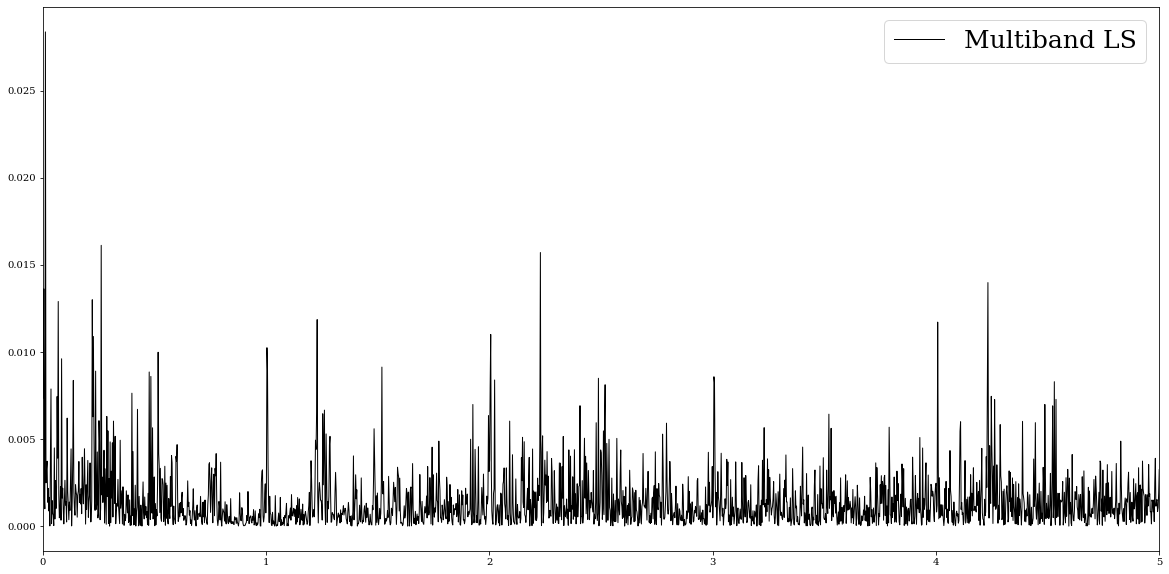

In [17]:
plt.figure(figsize=(20,10))
plt.plot(1/periods, P_multi, lw=1, color='k', label='Multiband LS')
#plt.plot(freq, 50000*powerTess*powerZTFG*powerZTFR*powerZTFI,c='k',label='TESSxgxrxi')
#plt.xlim(3,4)
plt.legend(fontsize=25)
plt.xlim(0,5)
#plt.plot([3.5283528352835285,3.5283528352835285],[0,0.005])
#plt.savefig('PG0010LSMulti.pdf')
print(1/freq[np.argmax(P_multi)])

22.334840084008402
0.011000600060006


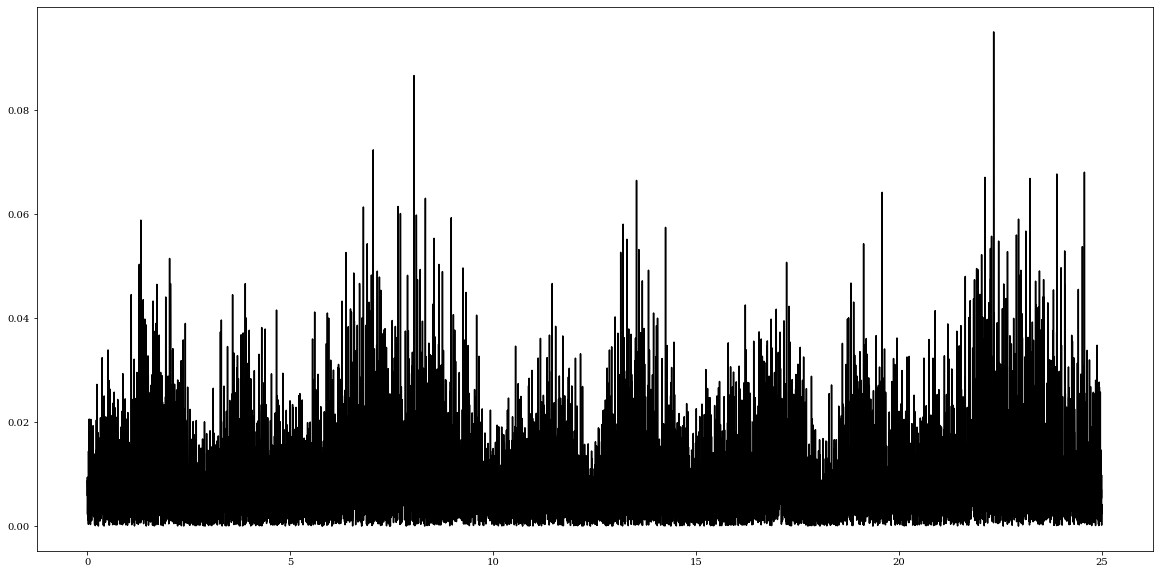

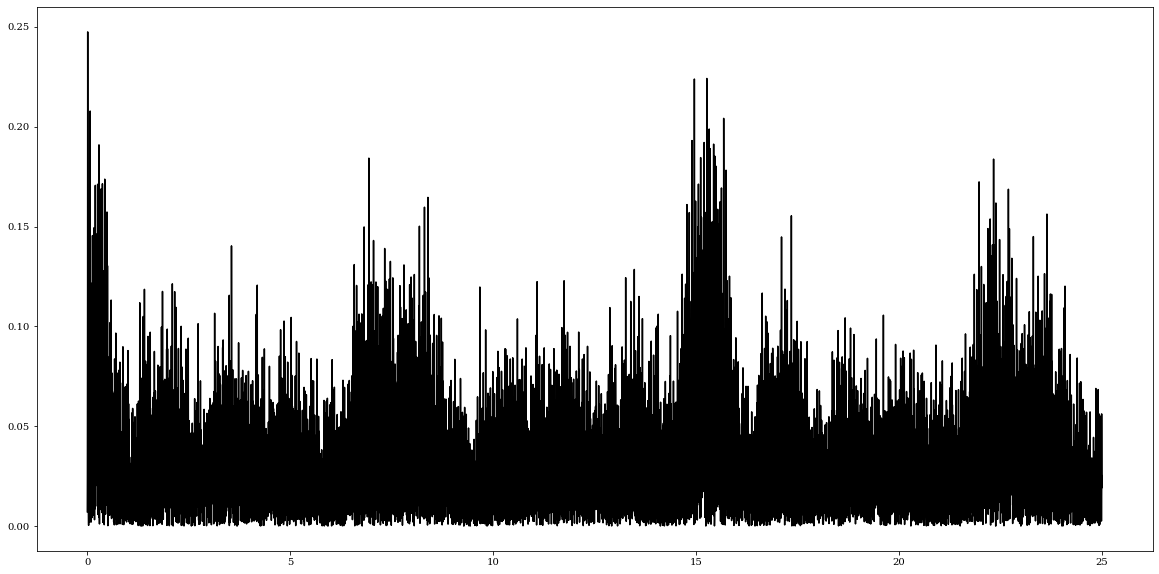

In [18]:
freq = np.linspace(0.001, 25, 10000)
powerPl = LombScargle(tWISE1,magsWISE1).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
print(freq[np.argmax(powerPl)])

powerWISE1 = powerPl
freq = np.linspace(0.001, 25, 10000)
powerPl = LombScargle(tWISE2,magsWISE2).power(freq)
plt.figure(figsize=(20,10))
#plt.plot([12.45,12.45], [0,max(powerPl)])
plt.plot(freq,powerPl, c='k')
print(freq[np.argmax(powerPl)])

powerWISE2 = powerPl


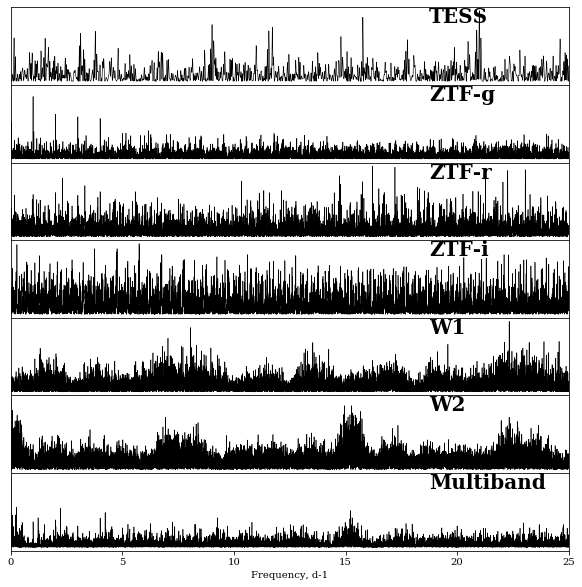

In [24]:
import string
fig, axs = plt.subplots(7,1,figsize=(10,10))
plt.subplots_adjust(hspace = 0)

axs = axs.flat
names = ['TESS', 'ZTF-g', 'ZTF-r', 'ZTF-i','W1', 'W2', 'Multiband']
for n, ax in enumerate(axs):
    ax.text(0.75, 0.8, names[n], transform=ax.transAxes, size=20, weight='bold')
axs[0].plot(freq, powerTess,lw=0.6, c='k')
axs[0].set_xlim(0,25)
axs[1].plot(freq, powerZTFG,lw=0.6, c='k')
axs[1].set_xlim(0,25)
axs[2].plot(freq, powerZTFR,lw=0.6, c='k')
axs[2].set_xlim(0,25)
axs[3].plot(freq, powerZTFI,lw=0.6, c='k')
axs[3].set_xlim(0,25)
axs[4].plot(freq, powerWISE1,lw=0.6, c='k')
axs[4].set_xlim(0,25)
axs[5].plot(freq, powerWISE2,lw=0.6, c='k')
axs[5].set_xlim(0,25)

axs[6].plot(1/periods, P_multi,lw=0.6, c='k')
axs[6].set_xlim(0,25)
axs[0].axes.yaxis.set_visible(False)
axs[1].axes.yaxis.set_visible(False)
axs[2].axes.yaxis.set_visible(False)
axs[3].axes.yaxis.set_visible(False)
axs[4].axes.yaxis.set_visible(False)
axs[5].axes.yaxis.set_visible(False)
axs[6].axes.yaxis.set_visible(False)
axs[0].axes.xaxis.set_visible(False)
axs[1].axes.xaxis.set_visible(False)
axs[2].axes.xaxis.set_visible(False)
axs[3].axes.xaxis.set_visible(False)
axs[4].axes.xaxis.set_visible(False)
axs[5].axes.xaxis.set_visible(False)
axs[6].set_xlabel('Frequency, d-1')
plt.savefig('PG0010PhotSumWise.pdf')

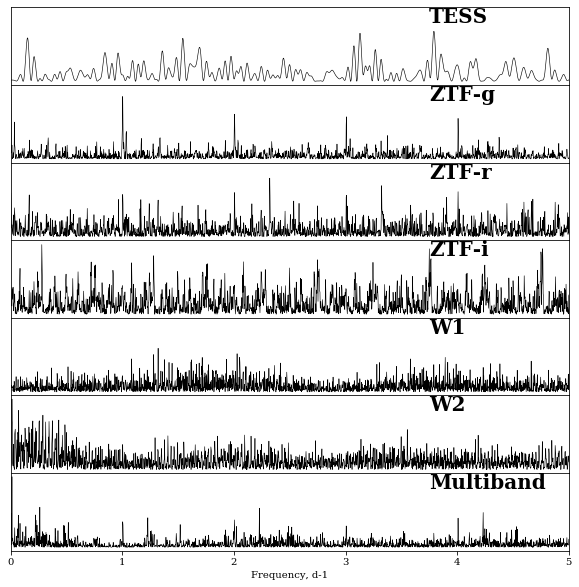

In [25]:
import string
fig, axs = plt.subplots(7,1,figsize=(10,10))
plt.subplots_adjust(hspace = 0)

axs = axs.flat
names = ['TESS', 'ZTF-g', 'ZTF-r', 'ZTF-i','W1', 'W2', 'Multiband']
for n, ax in enumerate(axs):
    ax.text(0.75, 0.8, names[n], transform=ax.transAxes, size=20, weight='bold')
axs[0].plot(freq, powerTess,lw=0.6, c='k')
axs[0].set_xlim(0,5)
axs[1].plot(freq, powerZTFG,lw=0.6, c='k')
axs[1].set_xlim(0,5)
axs[2].plot(freq, powerZTFR,lw=0.6, c='k')
axs[2].set_xlim(0,5)
axs[3].plot(freq, powerZTFI,lw=0.6, c='k')
axs[3].set_xlim(0,5)
axs[4].plot(freq, powerWISE1,lw=0.6, c='k')
axs[4].set_xlim(0,5)
axs[5].plot(freq, powerWISE2,lw=0.6, c='k')
axs[5].set_xlim(0,5)
axs[6].plot(1/periods, P_multi,lw=0.6, c='k')
axs[6].set_xlim(0,5)
axs[0].axes.yaxis.set_visible(False)
axs[1].axes.yaxis.set_visible(False)
axs[2].axes.yaxis.set_visible(False)
axs[3].axes.yaxis.set_visible(False)
axs[4].axes.yaxis.set_visible(False)
axs[5].axes.yaxis.set_visible(False)
axs[6].axes.yaxis.set_visible(False)
axs[0].axes.xaxis.set_visible(False)
axs[1].axes.xaxis.set_visible(False)
axs[2].axes.xaxis.set_visible(False)
axs[3].axes.xaxis.set_visible(False)
axs[4].axes.xaxis.set_visible(False)
axs[5].axes.xaxis.set_visible(False)
axs[6].set_xlabel('Frequency, d-1')
plt.savefig('PG0010PhotSumWiseZoom.pdf')